In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio 
from collections import defaultdict

In [2]:
X_train = np.load("RavdessAudioOnlyNumpy__X_train.npy")
X_test = np.load("RavdessAudioOnlyNumpy__X_test.npy")
y_train=pd.read_csv("RavdessAudioOnlyNumpy__Y_train.csv")
y_test=pd.read_csv("RavdessAudioOnlyNumpy__Y_test.csv")
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1828, 304304) (624, 304304)
(1828, 9) (624, 9)


In [3]:
X_train[np.isnan(X_train)] = 0
X_test[np.isnan(X_test)] = 0

In [4]:
df_train=pd.DataFrame(X_train)
df_test=pd.DataFrame(X_test)

## Transformations

In [5]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from scipy.signal import decimate

In [6]:
'''
#Downsample the signal after applying an anti-aliasing filter.
X_train_decimated=decimate(X_train,axis=1,q=8)
X_test_decimated=decimate(X_test,axis=1,q=8)
np.save("RavdessAudioOnlyNumpy__X_train_decimated.npy",X_train_decimated)
np.save("RavdessAudioOnlyNumpy__X_test_decimated.npy",X_test_decimated)
'''

In [7]:
X_train_decimated = np.load("RavdessAudioOnlyNumpy__X_train_decimated.npy")
X_test_decimated = np.load("RavdessAudioOnlyNumpy__X_test_decimated.npy")

In [8]:
df_train_decimated=pd.DataFrame(X_train_decimated)
df_test_decimated=pd.DataFrame(X_test_decimated)

In [9]:
#Scales time series so that their mean (resp. standard deviation) in each dimension is mu (resp. std).
scaler = TimeSeriesScalerMeanVariance(mu=0, std=1)

In [10]:
X_train_decimated_scaled=scaler.fit_transform(X_train_decimated)
X_test_decimated_scaled=scaler.transform(X_test_decimated)

In [11]:
X_train_decimated_scaled=X_train_decimated_scaled[:,:,0]
X_test_decimated_scaled=X_test_decimated_scaled[:,:,0]

In [12]:
df_train_decimated_scaled=pd.DataFrame(X_train_decimated_scaled)
df_test_decimated_scaled=pd.DataFrame(X_test_decimated_scaled)

Confronting the transformations

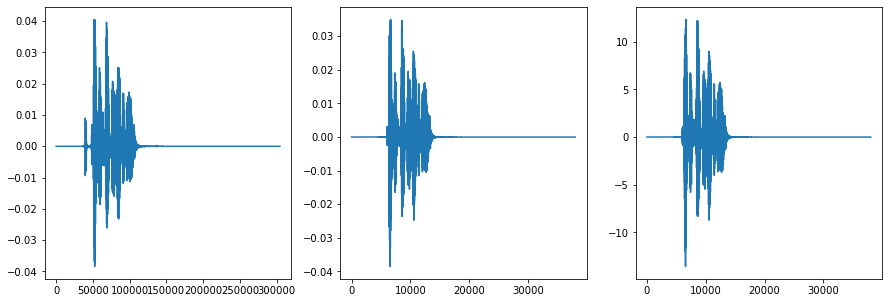

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.plot(df_train.iloc[0])
ax2.plot(df_train_decimated.iloc[0])
ax3.plot(df_train_decimated_scaled.iloc[0])
plt.show()

In [14]:
df_train.iloc[0].mean(), df_train_decimated.iloc[0].mean(), df_train_decimated_scaled.iloc[0].mean()

(4.7676194334037675e-07, 4.7130478586277917e-07, -2.825998700912553e-18)

In [15]:
df_train.iloc[0].std(), df_train_decimated.iloc[0].std(), df_train_decimated_scaled.iloc[0].std()

(0.002887818716104438, 0.002834538741339087, 1.0000131450095302)

# Smoothing

In [16]:
df_train_decimated_scaled_smoothed=df_train_decimated_scaled.T - df_train_decimated_scaled.T.rolling(window=20).mean()

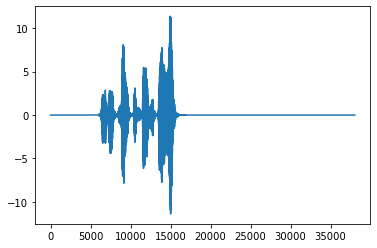

In [21]:
df_train_decimated_scaled.iloc[1800].plot()
plt.show()

# Trend removal


In [25]:
df_train_decimated_Tremoved = df_train_decimated.T.rolling(window = 20).mean()

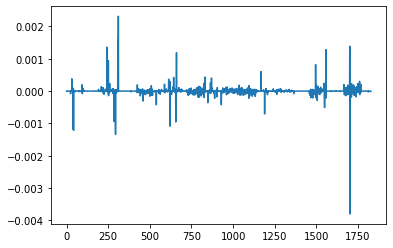

In [31]:
plt.plot(df_train_decimated_Tremoved.iloc[390])
#plt.plot(ts.rolling(window=12).mean())
plt.show()

# Eucl distance

In [32]:
from scipy.spatial.distance import euclidean

In [33]:
ts1 = df_train_decimated_scaled.iloc[1800]
ts2 = df_train_decimated_scaled.iloc[1801]
dist = euclidean(ts1, ts2)
dist

275.65752299144935

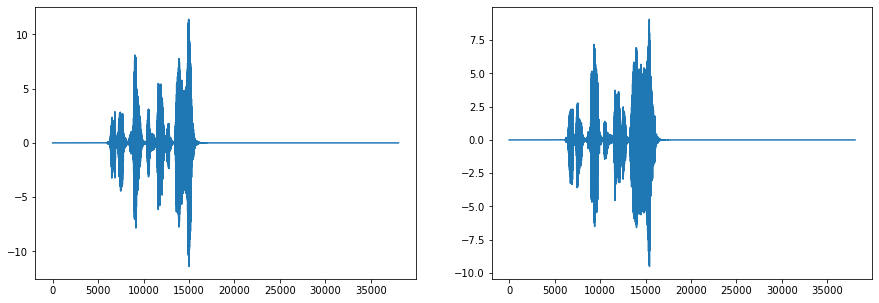

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(ts1)
ax2.plot(ts2)
plt.show()

# Manhattan distance

In [35]:
from scipy.spatial.distance import cityblock

In [36]:
distM = cityblock(ts1, ts2)
distM

16519.839337056535

# DTW

In [38]:
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

In [39]:
distDTW = dtw(ts1, ts2)
distDTW

105.78344171247923

In [40]:
from scipy.spatial.distance import cdist

In [ ]:
mat = cdist(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()
#p2p

In [ ]:
acc = subsequence_cost_matrix(ts1.values[:10].reshape(-1,1), ts2.values[:10].reshape(-1,1))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()
#cumulative

In [ ]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()
#starts top-left, ends bottom-right